In [1]:
#import necessary libraries
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in all the data files
cond_data = pd.read_csv("OperatingConditionsData.csv")
train_data = pd.read_csv("Train.csv")
compl_data = pd.read_csv("ComplaintsLog.csv")
comp_service_data = pd.read_csv("ComponentServiceLog.csv")
comp_replace_data = pd.read_csv("ComponentReplacementLog.csv")
machine_det_data= pd.read_csv("MachinesDetails.csv")

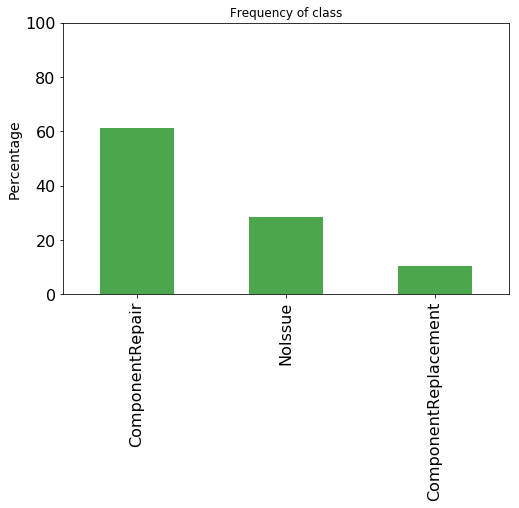

In [3]:
#Plot and see the counts of actions in train data
ind_percents = ((train_data.ActionPoint.value_counts()/sum(train_data.ActionPoint.value_counts()))*100)
plt.figure()
ind_percents.plot(kind='bar',figsize=(8,5),color=["green"],alpha = 0.7,fontsize=16)
plt.ylim([0,100])
plt.title('Frequency of class')
plt.ylabel('Percentage',fontsize = 14)
plt.show()

In [4]:
#Take out hour from the hh:mm:ss and merge it with the remaining date columns to get an event timestamp in all file dataframes

cond_data["hour"] = cond_data.Time.str.slice(0, 2)
compl_data["hour"] = compl_data.Time.str.slice(0, 2)
comp_replace_data["hour"] = comp_replace_data.Time.str.slice(0, 2)
comp_service_data["hour"] = comp_service_data.Time.str.slice(0, 2)

cond_data["event_timestamp"]=pd.to_datetime(cond_data[['Year', 'Month', 'Day', 'hour']])
compl_data["event_timestamp"]=pd.to_datetime(compl_data[['Year', 'Month', 'Day', 'hour']])
comp_replace_data["event_timestamp"]=pd.to_datetime(comp_replace_data[['Year', 'Month', 'Day', 'hour']])
comp_service_data["event_timestamp"]=pd.to_datetime(comp_service_data[['Year', 'Month', 'Day', 'hour']])

In [5]:
comp_service_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)
cond_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)
compl_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)
comp_replace_data.drop(['Day','Month','Year','hour','Time'],axis = 1, inplace=True)


In [6]:
print(cond_data.head())
print(cond_data.tail())
print("\n\n")
print(compl_data.head())
print(compl_data.tail())
print("\n\n")
print(comp_replace_data.head())
print(comp_replace_data.tail())
print("\n\n")
print(comp_service_data.head())
print(comp_service_data.tail())

  MachineID     Sensor1     Sensor2     Sensor3    Sensor4     event_timestamp
0  MID10889  190.860059  402.956047   99.838060  32.369191 2017-01-01 06:00:00
1  MID10889  168.825805  437.673549  116.476080  32.046604 2017-01-01 07:00:00
2  MID10889  157.674385  462.601905   95.230526  53.281389 2017-01-01 08:00:00
3  MID10889  142.552238  515.138959  117.245483  36.525593 2017-01-01 09:00:00
4  MID10889  176.730195  448.725899   95.536274  44.752883 2017-01-01 10:00:00
        MachineID   Sensor1   Sensor2    Sensor3   Sensor4     event_timestamp
9211495  MID11228  176.0029  466.0402   96.98566  42.62238 2017-11-30 19:00:00
9211496  MID11228  160.8821  478.9104   98.32616  33.68387 2017-11-30 20:00:00
9211497  MID11228  173.0875  405.5505  105.24030  35.59405 2017-11-30 21:00:00
9211498  MID11228  190.0894  472.0948  113.08650  44.00402 2017-11-30 22:00:00
9211499  MID11228  152.9487  529.2327  104.85980  42.30310 2017-11-30 23:00:00



  MachineID ErrorID     event_timestamp
0  MID108

In [7]:
#Take registered complaints and form dataset with sensor readings in it
error_readings_data = pd.merge(compl_data,cond_data,  how='left', left_on=['MachineID','event_timestamp'], right_on = ['MachineID','event_timestamp'])

In [8]:
print(error_readings_data.shape)
print(error_readings_data.drop_duplicates().shape)

(12628, 7)
(12628, 7)


In [9]:
#Add service periods and model numbers to the previous dataset
error_serviceperiod_data = pd.merge(error_readings_data,machine_det_data,  how='left', left_on=['MachineID'], right_on = ['MachineID'])

In [10]:
error_serviceperiod_data.head(10)

MachineID ErrorID     event_timestamp     Sensor1     Sensor2     Sensor3  \
0  MID10889  error1 2017-01-06 06:00:00  184.683179  435.684439  111.362469   
1  MID10889  error2 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
2  MID10889  error3 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
3  MID10889  error4 2017-02-22 04:00:00  175.750162  429.954216   84.852365   
4  MID10889  error1 2017-03-22 06:00:00  207.764180  544.320260   99.882954   
5  MID10889  error1 2017-05-04 17:00:00  181.142507  434.377792  121.628724   
6  MID10889  error1 2017-06-14 16:00:00  150.624069  575.722807  103.607219   
7  MID10889  error2 2017-06-20 06:00:00  157.174707  340.739953  105.628959   
8  MID10889  error3 2017-06-20 06:00:00  157.174707  340.739953  105.628959   
9  MID10889  error5 2017-07-18 08:00:00  173.153136  476.625597  101.095688   

     Sensor4 MachineModel  ServicePeriod  
0  43.696716       model3              7  
1  42.808727       model3              7  
2  42.808727       model3              7  
3  37.941056       model3              7  
4  41.681690       model3              7  
5  45.294079       model3              7  
6  45.379806       model3              7  
7  42.013704       model3              7  
8  42.013704       model3              7  
9  42.397772       model3              7

In [11]:
print(error_serviceperiod_data.isnull().sum())
print(error_serviceperiod_data.shape)

MachineID          0
ErrorID            0
event_timestamp    0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
MachineModel       0
ServicePeriod      0
dtype: int64
(12628, 9)


In [12]:
#All the actions in the complaint replacementlog data is of the type replacement. Add a column with the same
comp_replace_data["ActionPoint"] = "ComponentReplacement"

In [13]:
#Dummify component types
comp_dummies = pd.get_dummies(comp_replace_data.ComponentReplacement)
comp_dummies.columns = ['Component1', 'Component2', 'Component3','Component4']
comp_replace_data = comp_replace_data.join(comp_dummies)
comp_replace_data.head(5)

MachineID ComponentReplacement     event_timestamp           ActionPoint  \
0  MID10889           Component1 2017-01-07 06:00:00  ComponentReplacement   
1  MID10889           Component2 2017-02-21 06:00:00  ComponentReplacement   
2  MID10889           Component1 2017-03-23 06:00:00  ComponentReplacement   
3  MID10889           Component2 2017-06-21 06:00:00  ComponentReplacement   
4  MID10898           Component2 2017-02-10 06:00:00  ComponentReplacement   

   Component1  Component2  Component3  Component4  
0           1           0           0           0  
1           0           1           0           0  
2           1           0           0           0  
3           0           1           0           0  
4           0           1           0           0

In [14]:
comp_replace_data.drop(['ComponentReplacement'],axis = 1, inplace= True)

In [15]:
comp_replace_data = comp_replace_data.drop_duplicates()
print(comp_replace_data.shape)

(7087, 7)


In [16]:
#Get sensor readings for replaced components based on their ids and timestamps
comp_replace_data = pd.merge(comp_replace_data,cond_data,  how='left', left_on=['MachineID','event_timestamp'], right_on = ['MachineID','event_timestamp'])

In [17]:
print(comp_replace_data.drop_duplicates().shape)
print(comp_replace_data.isnull().sum())

(7087, 11)
MachineID          0
event_timestamp    0
ActionPoint        0
Component1         0
Component2         0
Component3         0
Component4         0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
dtype: int64


In [18]:
#Dummify components from the servicelog data
comp_service_dummies = pd.get_dummies(comp_service_data.ComponentAttended)
comp_service_dummies.columns = ['Component1', 'Component2', 'Component3','Component4']
comp_service_data = comp_service_data.join(comp_service_dummies)
comp_service_data.head(5)

MachineID ComponentAttended       ServiceType     event_timestamp  \
0  MID10889        Component1  ScheduledService 2016-06-01 06:00:00   
1  MID10889        Component2  ScheduledService 2016-06-01 06:00:00   
2  MID10889        Component3   ComponentRepair 2016-07-31 06:00:00   
3  MID10889        Component4   ComponentRepair 2016-09-14 06:00:00   
4  MID10889        Component1   ComponentRepair 2017-01-07 06:00:00   

   Component1  Component2  Component3  Component4  
0           1           0           0           0  
1           0           1           0           0  
2           0           0           1           0  
3           0           0           0           1  
4           1           0           0           0

In [19]:
comp_service_data.drop(['ComponentAttended'],axis = 1, inplace= True)

In [20]:
#Servicetype is essentially actions taken. We can rename it to ActionPoint
comp_service_data = comp_service_data.rename(columns={'ServiceType': 'ActionPoint'})

In [21]:
comp_service_data.shape

(34490, 7)

In [22]:
comp_service_data.tail()

MachineID      ActionPoint     event_timestamp  Component1  Component2  \
34485  MID11228  ComponentRepair 2017-09-12 06:00:00           1           0   
34486  MID11228  ComponentRepair 2017-09-27 06:00:00           1           0   
34487  MID11228  ComponentRepair 2017-10-12 06:00:00           1           0   
34488  MID11228  ComponentRepair 2017-10-27 06:00:00           1           0   
34489  MID11228  ComponentRepair 2017-11-11 06:00:00           1           0   

       Component3  Component4  
34485           0           0  
34486           0           0  
34487           0           0  
34488           0           0  
34489           0           0

In [23]:
# Add sensory reading details to service log data based on Ids and time of service 
comp_service_data = pd.merge(comp_service_data,cond_data,  how='left', left_on=['MachineID','event_timestamp'], right_on = ['MachineID','event_timestamp'])

In [24]:
#Now the dimensions and values of both serviced details and replaced details are same. Let us combine it to one single dataframe
comp_rep_ser_data = comp_replace_data.append(comp_service_data)

In [25]:
comp_rep_ser_data.isnull().sum()

ActionPoint           0
Component1            0
Component2            0
Component3            0
Component4            0
MachineID             0
Sensor1            4600
Sensor2            4600
Sensor3            4600
Sensor4            4600
event_timestamp       0
dtype: int64

In [26]:
comp_rep_ser_data.shape

(41577, 11)

In [27]:
apd_withreadings_data = pd.merge(comp_rep_ser_data,cond_data, how='left', left_on=['MachineID','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4'], right_on = ['MachineID','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4'])
#There are 4600 null values that do not have sensory readings data in the  operating conditions file. But this does not affect our modelling as the number of observations are high. We will remove it at a later stage.

In [28]:
apd_withreadings_data.shape

(41577, 11)

In [29]:
apd_withreadings_data.drop_duplicates().shape

(41577, 11)

In [30]:
apd_withreadings_data.tail()

ActionPoint  Component1  Component2  Component3  Component4  \
41572  ComponentRepair           1           0           0           0   
41573  ComponentRepair           1           0           0           0   
41574  ComponentRepair           1           0           0           0   
41575  ComponentRepair           1           0           0           0   
41576  ComponentRepair           1           0           0           0   

      MachineID   Sensor1   Sensor2    Sensor3   Sensor4     event_timestamp  
41572  MID11228  203.7836  375.4876  108.05780  37.36023 2017-09-12 06:00:00  
41573  MID11228  177.8353  521.2512   99.56644  50.28459 2017-09-27 06:00:00  
41574  MID11228  195.9804  497.3930   98.32258  42.09319 2017-10-12 06:00:00  
41575  MID11228  171.7633  509.0300  100.66310  39.86645 2017-10-27 06:00:00  
41576  MID11228  169.4248  427.9189   85.74770  32.48284 2017-11-11 06:00:00

In [31]:
#Add machine details data to the same to include model numbers and service periods
apd_withreadingsandmodel_data = pd.merge(apd_withreadings_data,machine_det_data, how='left', left_on=['MachineID'], right_on = ['MachineID'])

In [32]:
apd_withreadingsandmodel_data.drop_duplicates().shape

(41577, 13)

In [33]:
apd_withreadingsandmodel_data.isnull().sum()

ActionPoint           0
Component1            0
Component2            0
Component3            0
Component4            0
MachineID             0
Sensor1            4600
Sensor2            4600
Sensor3            4600
Sensor4            4600
event_timestamp       0
MachineModel          0
ServicePeriod         0
dtype: int64

In [34]:
#Dummify error attribute
comp_error_dummies = pd.get_dummies(error_serviceperiod_data.ErrorID)
comp_error_dummies.columns = ['Error1', 'Error2', 'Error3','Error4','Error5']
error_serviceperiod_data = error_serviceperiod_data.join(comp_error_dummies)
error_serviceperiod_data.drop(["ErrorID"],axis=1,inplace=True)
error_serviceperiod_data.head(5)

MachineID     event_timestamp     Sensor1     Sensor2     Sensor3  \
0  MID10889 2017-01-06 06:00:00  184.683179  435.684439  111.362469   
1  MID10889 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
2  MID10889 2017-02-20 06:00:00  177.366544  447.619650   99.665799   
3  MID10889 2017-02-22 04:00:00  175.750162  429.954216   84.852365   
4  MID10889 2017-03-22 06:00:00  207.764180  544.320260   99.882954   

     Sensor4 MachineModel  ServicePeriod  Error1  Error2  Error3  Error4  \
0  43.696716       model3              7       1       0       0       0   
1  42.808727       model3              7       0       1       0       0   
2  42.808727       model3              7       0       0       1       0   
3  37.941056       model3              7       0       0       0       1   
4  41.681690       model3              7       1       0       0       0   

   Error5  
0       0  
1       0  
2       0  
3       0  
4       0

In [35]:
#This is to make service details data have the same dimensions as error details data. All component values will be zero to show that no replacement was done and it was either a repair or noissue
servprd_dummy= pd.DataFrame(0, index=np.arange(len(error_serviceperiod_data)), columns=['Component1', 'Component2', 'Component3','Component4'])
error_serviceperiod_data=error_serviceperiod_data.join(servprd_dummy)
#error_serviceperiod_data['Error6']=0
#error_serviceperiod_data['Component5']=1

In [36]:
#This is to make error details data have the same dimensions as service details data. All errors will be zero to show that it was not an error at all.
apd_dummy= pd.DataFrame(0, index=np.arange(len(apd_withreadingsandmodel_data)), columns=['Error1', 'Error2', 'Error3','Error4','Error5'])
apd_withreadingsandmodel_data = apd_withreadingsandmodel_data.join(apd_dummy)

In [37]:
apd_withreadingsandmodel_data.head()

ActionPoint  Component1  Component2  Component3  Component4  \
0  ComponentReplacement           1           0           0           0   
1  ComponentReplacement           0           1           0           0   
2  ComponentReplacement           1           0           0           0   
3  ComponentReplacement           0           1           0           0   
4  ComponentReplacement           0           1           0           0   

  MachineID     Sensor1     Sensor2     Sensor3    Sensor4  \
0  MID10889  184.934180  503.444049   93.812773  39.087756   
1  MID10889  168.123596  411.475492   87.283553  38.291023   
2  MID10889  182.390822  474.712407  102.214781  50.246393   
3  MID10889  154.394357  413.117641  114.851772  39.946298   
4  MID10898  155.675812  353.992202   98.729670  36.599353   

      event_timestamp MachineModel  ServicePeriod  Error1  Error2  Error3  \
0 2017-01-07 06:00:00       model3              7       0       0       0   
1 2017-02-21 06:00:00       model3              7       0       0       0   
2 2017-03-23 06:00:00       model3              7       0       0       0   
3 2017-06-21 06:00:00       model3              7       0       0       0   
4 2017-02-10 06:00:00       model3              7       0       0       0   

   Error4  Error5  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [38]:
apd_withreadingsandmodel_data.ActionPoint.unique()

array(['ComponentReplacement', 'ScheduledService', 'ComponentRepair'], dtype=object)

In [39]:
#We can replace ScheduledService with NoIssues as per problem statement (Machine is still working)
apd_withreadingsandmodel_data.loc[apd_withreadingsandmodel_data.ActionPoint=="ScheduledService",'ActionPoint'] = "NoIssue"

In [40]:
error_serviceperiod_data["ActionPoint"] = "NoIssue"

In [41]:
#Reorder and add both error and service data for our final dataset
apd_withreadingsandmodel_data = apd_withreadingsandmodel_data[['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5','ActionPoint']]
error_serviceperiod_data = error_serviceperiod_data[['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5','ActionPoint']]
error_serviceperiod_data = error_serviceperiod_data.append(apd_withreadingsandmodel_data)

In [42]:
final_model_dataset = error_serviceperiod_data[['MachineID', 'MachineModel','ServicePeriod','event_timestamp','Sensor1','Sensor2','Sensor3','Sensor4','Component1','Component2','Component3','Component4','Error1','Error2','Error3','Error4','Error5','ActionPoint']]

In [43]:
final_model_dataset.ActionPoint.unique()

array(['NoIssue', 'ComponentReplacement', 'ComponentRepair'], dtype=object)

In [44]:
final_model_dataset.isnull().sum()

MachineID             0
MachineModel          0
ServicePeriod         0
event_timestamp       0
Sensor1            4600
Sensor2            4600
Sensor3            4600
Sensor4            4600
Component1            0
Component2            0
Component3            0
Component4            0
Error1                0
Error2                0
Error3                0
Error4                0
Error5                0
ActionPoint           0
dtype: int64

In [45]:
final_model_dataset.dropna(inplace=True)

In [46]:
final_model_dataset.dtypes

MachineID                  object
MachineModel               object
ServicePeriod               int64
event_timestamp    datetime64[ns]
Sensor1                   float64
Sensor2                   float64
Sensor3                   float64
Sensor4                   float64
Component1                  int64
Component2                  int64
Component3                  int64
Component4                  int64
Error1                      int64
Error2                      int64
Error3                      int64
Error4                      int64
Error5                      int64
ActionPoint                object
dtype: object

In [47]:
final_model_dataset.isnull().sum()

MachineID          0
MachineModel       0
ServicePeriod      0
event_timestamp    0
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
Component1         0
Component2         0
Component3         0
Component4         0
Error1             0
Error2             0
Error3             0
Error4             0
Error5             0
ActionPoint        0
dtype: int64

In [48]:
ind_percents = ((final_model_dataset.ActionPoint.value_counts()/sum(final_model_dataset.ActionPoint.value_counts()))*100)
plt.figure()
ind_percents.plot(kind='bar',
                                  figsize=(5,5),
                                  color=["green","red","blue"],
                                  alpha = 0.7,
                                  fontsize=16)

plt.ylim([0,100])
plt.title('Frequency of class')
plt.ylabel('Percentage',fontsize = 14)

plt.show()

In [49]:
plt.title("Sensor reading distrbutions")
plt.xlabel("Observations")
plt.ylabel("Sensor readings")
plt.plot(final_model_dataset[["Sensor1","Sensor2","Sensor3","Sensor4"]])

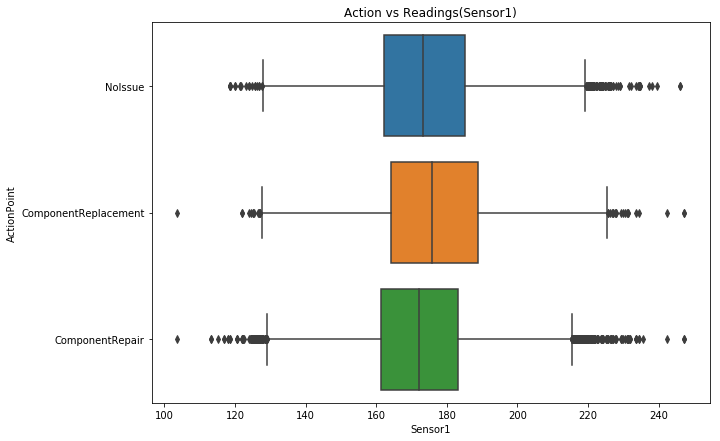

In [50]:
plt.figure(figsize = (10,7))
plt.title("Action vs Readings(Sensor1)")
plt.ylabel("Actions taken")
plt.xlabel("Sensory Readings")
sns.boxplot(final_model_dataset["Sensor1"],final_model_dataset["ActionPoint"])

In [51]:
print(sns.distplot(final_model_dataset["Sensor1"]))

Axes(0.125,0.125;0.775x0.755)


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


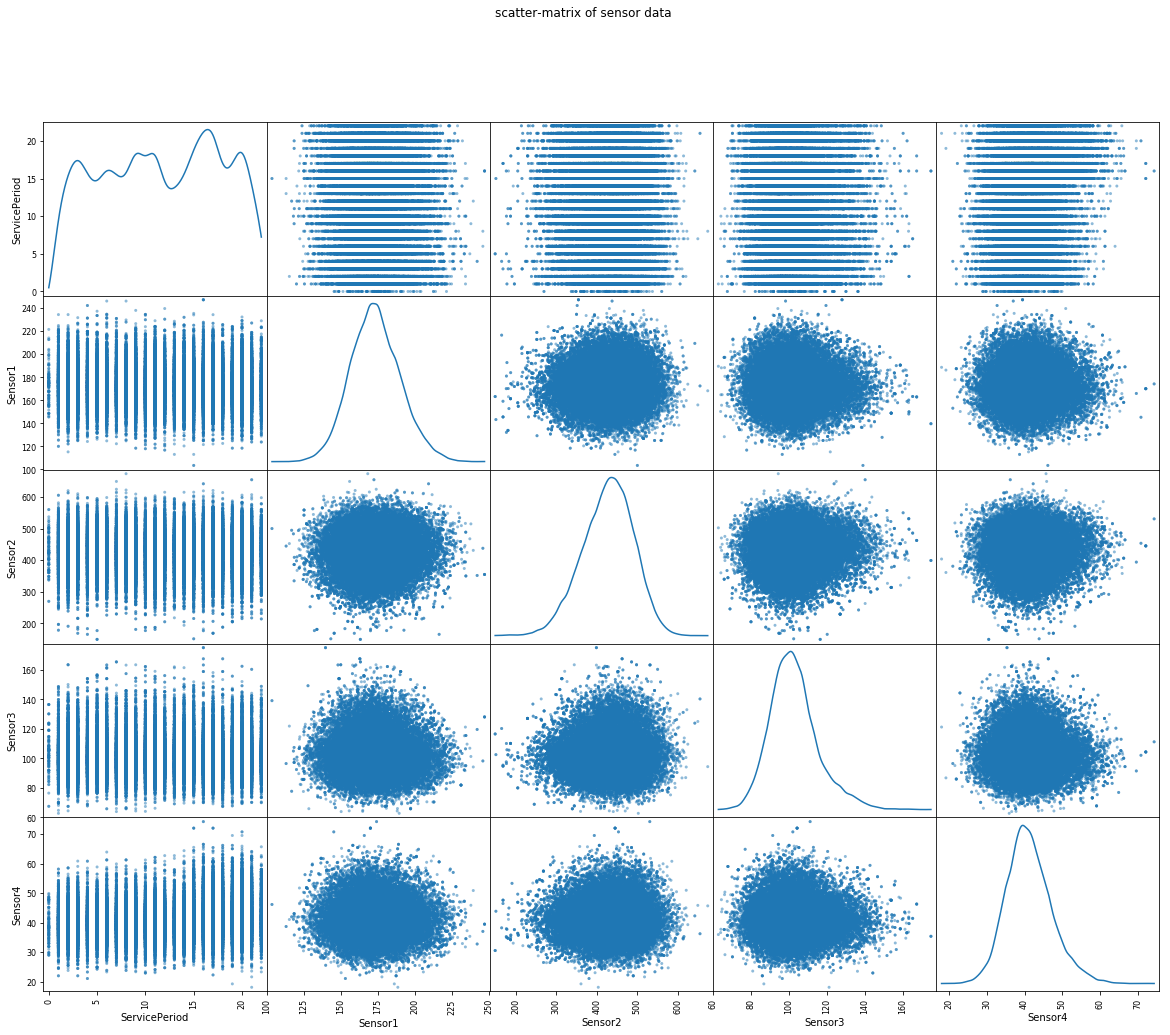

In [52]:
pd.scatter_matrix(final_model_dataset.loc[:,'MachineID':'Sensor4'], figsize=(20,16), diagonal='kde')
plt.suptitle('scatter-matrix of sensor data')
plt.show()

In [53]:
plt.figure(figsize = (10,7))
plt.title("Actions vs Service Period")
sns.boxplot(final_model_dataset["ActionPoint"],final_model_dataset["ServicePeriod"])

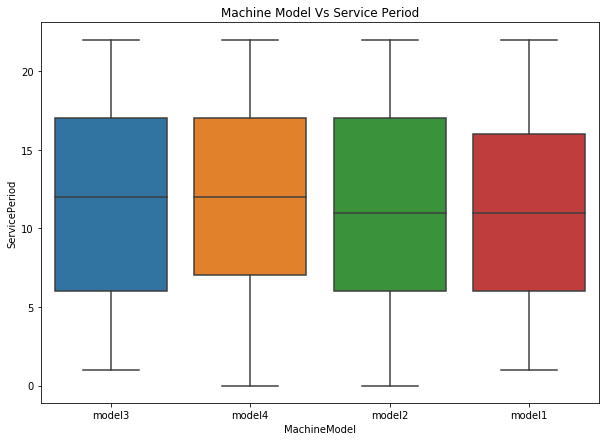

In [54]:
plt.figure(figsize = (10,7))
plt.title("Machine Model Vs Service Period")
sns.boxplot(final_model_dataset["MachineModel"],final_model_dataset["ServicePeriod"])

In [55]:
final_model_dataset[['Component1','Component2']].hist(grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4c7110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a4ec650>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1785a710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1833b550>]], dtype=object)

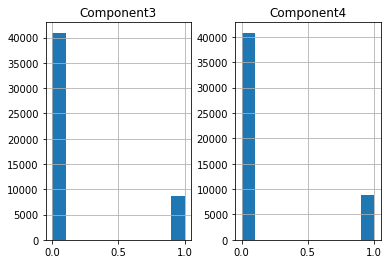

In [56]:
final_model_dataset[['Component3','Component4']].hist(grid=True)

In [57]:
#change model numbers to numerical
final_model_dataset.loc[final_model_dataset.MachineModel=="model1",'MachineModel'] = 1
final_model_dataset.loc[final_model_dataset.MachineModel=="model2",'MachineModel'] = 2
final_model_dataset.loc[final_model_dataset.MachineModel=="model3",'MachineModel'] = 3
final_model_dataset.loc[final_model_dataset.MachineModel=="model4",'MachineModel'] = 4
final_model_dataset["MachineModel"] = pd.to_numeric(final_model_dataset["MachineModel"])

In [59]:
final_model_dataset.drop("ActionPoint",axis=1,inplace=True)

In [60]:
final_model_dataset.dtypes

MachineID                  object
MachineModel                int64
ServicePeriod               int64
event_timestamp    datetime64[ns]
Sensor1                   float64
Sensor2                   float64
Sensor3                   float64
Sensor4                   float64
Component1                  int64
Component2                  int64
Component3                  int64
Component4                  int64
Error1                      int64
Error2                      int64
Error3                      int64
Error4                      int64
Error5                      int64
dtype: object

In [61]:
final_model_dataset.shape

(49605, 17)

In [62]:
final_model_dataset.drop_duplicates(inplace=True)

In [291]:
final_model_dataset.shape

(42731, 17)

In [408]:
agg_dataset = pd.DataFrame(final_model_dataset.groupby("MachineID",as_index=False).mean())

In [355]:
#agg_dataset.head(1000)

In [409]:
agg_dataset.dtypes

MachineID         object
MachineModel     float64
ServicePeriod    float64
Sensor1          float64
Sensor2          float64
Sensor3          float64
Sensor4          float64
Component1       float64
Component2       float64
Component3       float64
Component4       float64
Error1           float64
Error2           float64
Error3           float64
Error4           float64
Error5           float64
dtype: object

In [410]:
train_data_model = pd.merge(train_data,agg_dataset,how="left",left_on=["MachineID"],right_on=["MachineID"])

In [411]:
train_data_model.dtypes

MachineID         object
ActionPoint       object
MachineModel     float64
ServicePeriod    float64
Sensor1          float64
Sensor2          float64
Sensor3          float64
Sensor4          float64
Component1       float64
Component2       float64
Component3       float64
Component4       float64
Error1           float64
Error2           float64
Error3           float64
Error4           float64
Error5           float64
dtype: object

In [412]:
train_data_model.shape

(674, 17)

In [413]:
test_data = pd.read_csv("Test.csv")

In [414]:
test_data_model = pd.merge(test_data,agg_dataset,how="left",left_on=["MachineID"],right_on=["MachineID"])

In [415]:
test_data_model.shape

(326, 16)

In [128]:
#final_model_dataset.to_csv("final_model_dataset.csv")
#train_data_model.to_csv("train_data_model.csv")
#test_data_model.to_csv("test_data_model.csv")

In [416]:
train_data_model.drop("ActionPoint",axis=1,inplace=True)

In [422]:
train_data_model.shape

(1000, 16)

In [421]:
train_data_model= train_data_model.append(test_data_model)

In [423]:
agg_dataset.shape

(1150, 16)

In [428]:
validation_data_model = pd.concat([train_data_model,agg_dataset]).drop_duplicates(keep = False)

In [429]:
validation_data_model.shape

(150, 16)

In [ ]:
col_list = [3, 5]

In [168]:
validation_data_model.to_csv("validation_data_model.csv")